### 2.1 Chuẩn bị dữ liệu

In [2]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1. Lấy dữ liệu từ URL, hoặc lấy từ wdbc.data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]  # 1 ID, 1 nhãn, 30 đặc trưng
data = pd.read_csv(url, header=None, names=columns)

In [4]:
# 2. Tiền xử lý dữ liệu
# Loại bỏ cột ID (không cần thiết)
data = data.drop(columns=['ID'])

# Chuyển đổi nhãn 'M' và 'B' thành số (1 cho ác tính - M, 0 cho lành tính - B)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

In [5]:
# Kiểm tra thông tin dữ liệu
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Diagnosis   569 non-null    int64  
 1   Feature_1   569 non-null    float64
 2   Feature_2   569 non-null    float64
 3   Feature_3   569 non-null    float64
 4   Feature_4   569 non-null    float64
 5   Feature_5   569 non-null    float64
 6   Feature_6   569 non-null    float64
 7   Feature_7   569 non-null    float64
 8   Feature_8   569 non-null    float64
 9   Feature_9   569 non-null    float64
 10  Feature_10  569 non-null    float64
 11  Feature_11  569 non-null    float64
 12  Feature_12  569 non-null    float64
 13  Feature_13  569 non-null    float64
 14  Feature_14  569 non-null    float64
 15  Feature_15  569 non-null    float64
 16  Feature_16  569 non-null    float64
 17  Feature_17  569 non-null    float64
 18  Feature_18  569 non-null    float64
 19  Feature_19  569 non-null    f

In [6]:
# Kiểm tra sơ bộ
print(data.head())

   Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0          1      17.99      10.38     122.80     1001.0    0.11840   
1          1      20.57      17.77     132.90     1326.0    0.08474   
2          1      19.69      21.25     130.00     1203.0    0.10960   
3          1      11.42      20.38      77.58      386.1    0.14250   
4          1      20.29      14.34     135.10     1297.0    0.10030   

   Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_21  Feature_22  \
0    0.27760     0.3001    0.14710     0.2419  ...       25.38       17.33   
1    0.07864     0.0869    0.07017     0.1812  ...       24.99       23.41   
2    0.15990     0.1974    0.12790     0.2069  ...       23.57       25.53   
3    0.28390     0.2414    0.10520     0.2597  ...       14.91       26.50   
4    0.13280     0.1980    0.10430     0.1809  ...       22.54       16.67   

   Feature_23  Feature_24  Feature_25  Feature_26  Feature_27  Feature_28  \
0      184.60      2019.0  

In [7]:
# Kiểm tra giá trị duy nhất trong nhãn:
print(data['Diagnosis'].value_counts())

Diagnosis
0    357
1    212
Name: count, dtype: int64


In [8]:
# Kiểm tra thống kê dữ liệu:
print(data.describe())

        Diagnosis   Feature_1   Feature_2   Feature_3    Feature_4  \
count  569.000000  569.000000  569.000000  569.000000   569.000000   
mean     0.372583   14.127292   19.289649   91.969033   654.889104   
std      0.483918    3.524049    4.301036   24.298981   351.914129   
min      0.000000    6.981000    9.710000   43.790000   143.500000   
25%      0.000000   11.700000   16.170000   75.170000   420.300000   
50%      0.000000   13.370000   18.840000   86.240000   551.100000   
75%      1.000000   15.780000   21.800000  104.100000   782.700000   
max      1.000000   28.110000   39.280000  188.500000  2501.000000   

        Feature_5   Feature_6   Feature_7   Feature_8   Feature_9  ...  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  ...   
mean     0.096360    0.104341    0.088799    0.048919    0.181162  ...   
std      0.014064    0.052813    0.079720    0.038803    0.027414  ...   
min      0.052630    0.019380    0.000000    0.000000    0.106000  ...   

In [9]:
# 3. Xáo trộn dữ liệu
data = shuffle(data, random_state=42)

# 4. Xác định đặc trưng và nhãn
X = data.drop(columns=['Diagnosis'])  # Đặc trưng
y = data['Diagnosis']  # Nhãn

# 5. Phân chia dữ liệu với các tỷ lệ khác nhau
splits = {'40/60': 0.4, '60/40': 0.6, '80/20': 0.8, '90/10': 0.9}
datasets = {}

for split_name, train_ratio in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=train_ratio, stratify=y, random_state=42
    )
    
    datasets[split_name] = {
        'feature_train': X_train,
        'label_train': y_train,
        'feature_test': X_test,
        'label_test': y_test,
    }

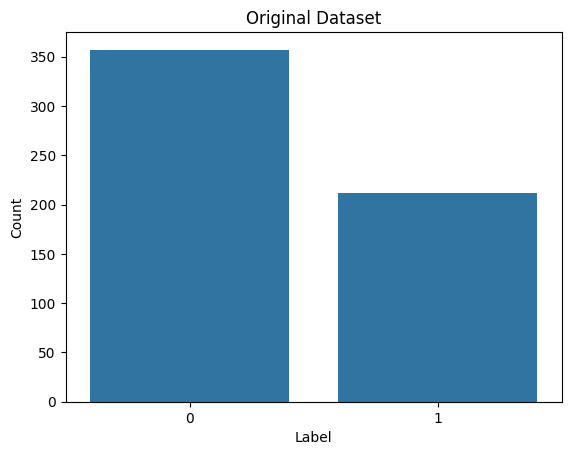

In [10]:

# 6. Hình dung phân phối nhãn
def plot_label_distribution(y, title):
    sns.countplot(x=y)
    plt.title(title)
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.show()

# Phân phối dữ liệu gốc
plot_label_distribution(y, 'Original Dataset')

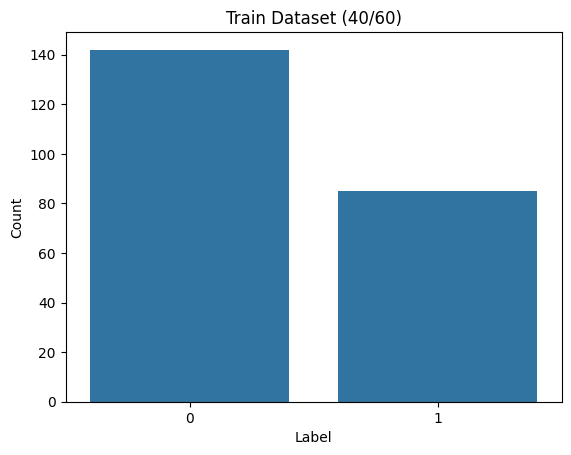

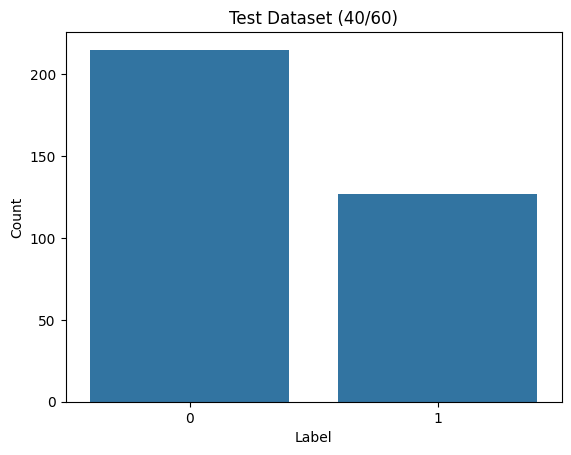

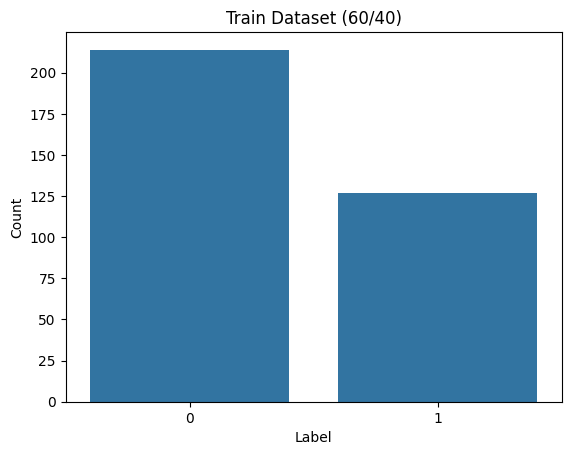

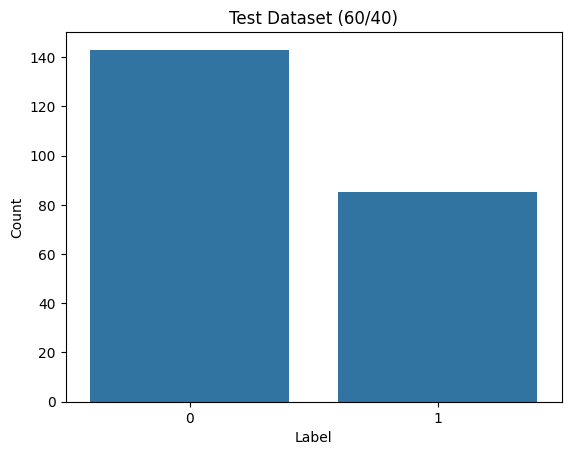

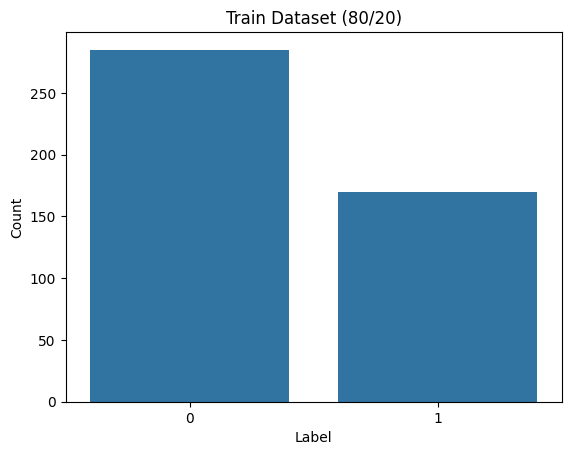

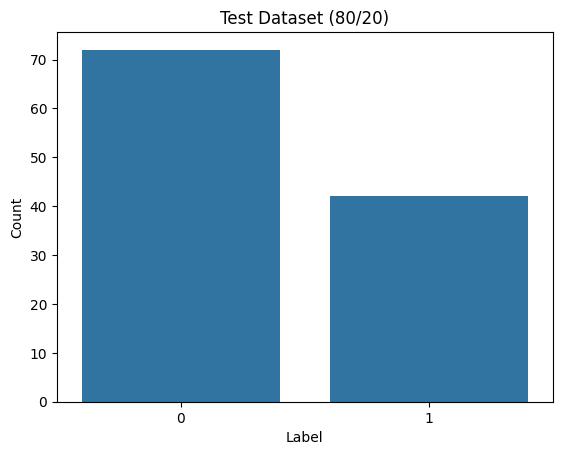

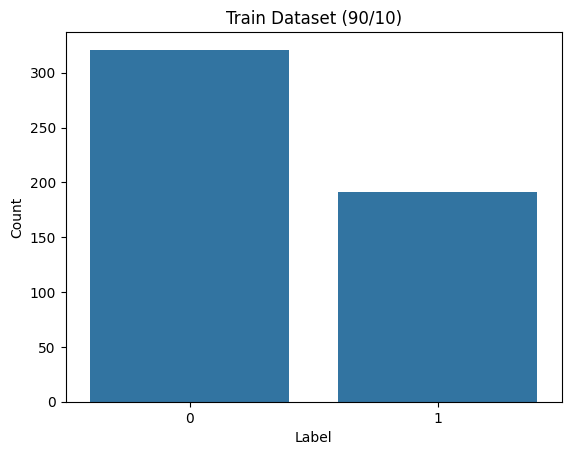

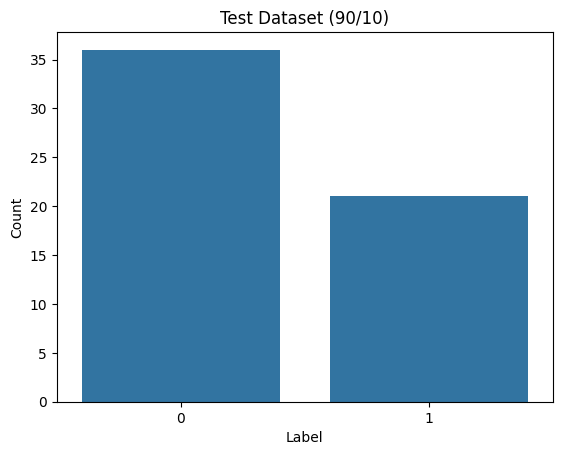

In [11]:
# Phân phối các tập con
for split_name, dataset in datasets.items():
    plot_label_distribution(dataset['label_train'], f'Train Dataset ({split_name})')
    plot_label_distribution(dataset['label_test'], f'Test Dataset ({split_name})')

# # Đưa dữ liệu vào csv (nếu cần kiểm tra)
# for split_name, dataset in datasets.items():
#     dataset['feature_train'].to_csv(f'{split_name}_feature_train.csv', index=False)
#     dataset['label_train'].to_csv(f'{split_name}_label_train.csv', index=False)
#     dataset['feature_test'].to_csv(f'{split_name}_feature_test.csv', index=False)
#     dataset['label_test'].to_csv(f'{split_name}_label_test.csv', index=False)

### 2.2 Xây dựng bộ phân loại decision tree

In [12]:
# Import các thư viện cần thiết cho phần 2.2
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, accuracy_score
import graphviz

In [13]:
# 1. Hàm huấn luyện và trực quan hóa cây quyết định
def train_and_visualize(features_train, labels_train, features_test, labels_test, split_name):
    # Khởi tạo mô hình Decision Tree với tiêu chí Entropy
    model = DecisionTreeClassifier(criterion='entropy', random_state=42)
    
    # Huấn luyện mô hình
    model.fit(features_train, labels_train)
    
    # Dự đoán trên tập kiểm tra
    predictions = model.predict(features_test)
    
    # Đánh giá hiệu suất mô hình
    print(f"--- Results for split {split_name} ---")
    print("Classification Report:")
    print(classification_report(labels_test, predictions))
    accuracy = accuracy_score(labels_test, predictions)
    print(f"Accuracy: {accuracy:.2f}\n")
    
    # Trực quan hóa cây quyết định
    dot_data = export_graphviz(
        model,
        out_file=None,
        feature_names=features_train.columns,  # Tên các đặc trưng
        class_names=['Benign', 'Malignant'],  # Tên nhãn
        filled=True,
        rounded=True,
        special_characters=True
    )
    
    # Hiển thị cây quyết định bằng Graphviz
    graph = graphviz.Source(dot_data)
    graph.render(f"output1/{split_name.replace('/', '_')}")  # Lưu cây dưới dạng file PDF
    # graph.view()  # Mở cây trực tiếp

In [14]:
# 2. Huấn luyện và trực quan hóa với từng tập con
for split_name, dataset in datasets.items():
    train_and_visualize(
        features_train=dataset['feature_train'],
        labels_train=dataset['label_train'],
        features_test=dataset['feature_test'],
        labels_test=dataset['label_test'],
        split_name=split_name
    )

--- Results for split 40/60 ---
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       215
           1       0.89      0.93      0.91       127

    accuracy                           0.93       342
   macro avg       0.92      0.93      0.93       342
weighted avg       0.93      0.93      0.93       342

Accuracy: 0.93

--- Results for split 60/40 ---
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       143
           1       0.87      0.89      0.88        85

    accuracy                           0.91       228
   macro avg       0.90      0.91      0.91       228
weighted avg       0.91      0.91      0.91       228

Accuracy: 0.91

--- Results for split 80/20 ---
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        72
           1       0.95      0.83      0

### 2.3 Đánh giá các bộ phân loại decision tree

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# 1. Hàm đánh giá mô hình và tạo báo cáo
def evaluate_model(features_test, labels_test, model, split_name):
    # Dự đoán trên tập kiểm tra
    predictions = model.predict(features_test)
    
    # Classification Report
    print(f"--- Classification Report for split {split_name} ---")
    print(classification_report(labels_test, predictions))
    
    # Confusion Matrix
    cm = confusion_matrix(labels_test, predictions)
    print(f"Confusion Matrix for split {split_name}:\n{cm}")
    
    # Trực quan hóa ma trận nhầm lẫn
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.title(f"Confusion Matrix for {split_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Trả về mô hình và độ chính xác
    accuracy = accuracy_score(labels_test, predictions)
    return accuracy

--- Classification Report for split 40/60 ---
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       215
           1       0.89      0.93      0.91       127

    accuracy                           0.93       342
   macro avg       0.92      0.93      0.93       342
weighted avg       0.93      0.93      0.93       342

Confusion Matrix for split 40/60:
[[200  15]
 [  9 118]]


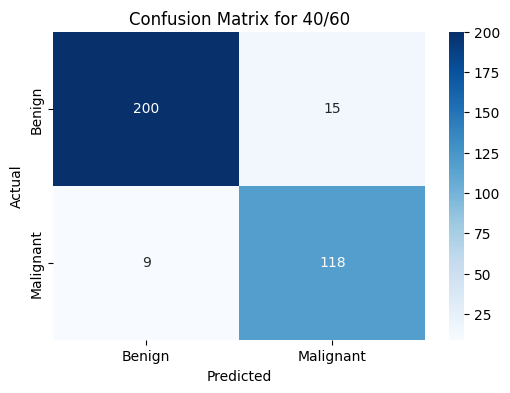

--- Classification Report for split 60/40 ---
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       143
           1       0.87      0.89      0.88        85

    accuracy                           0.91       228
   macro avg       0.90      0.91      0.91       228
weighted avg       0.91      0.91      0.91       228

Confusion Matrix for split 60/40:
[[132  11]
 [  9  76]]


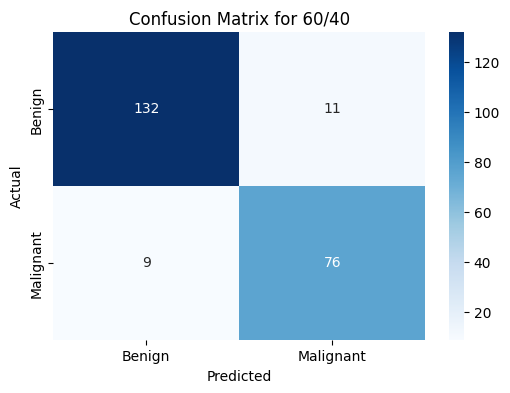

--- Classification Report for split 80/20 ---
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        72
           1       0.95      0.83      0.89        42

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114

Confusion Matrix for split 80/20:
[[70  2]
 [ 7 35]]


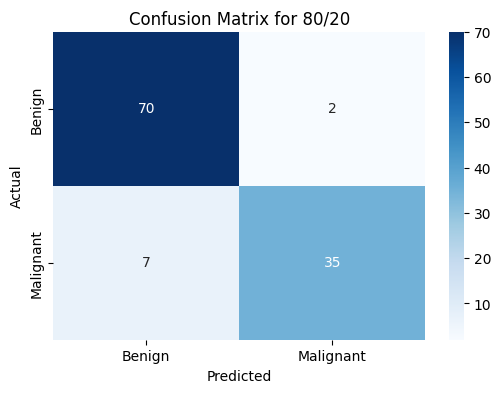

--- Classification Report for split 90/10 ---
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        36
           1       1.00      0.86      0.92        21

    accuracy                           0.95        57
   macro avg       0.96      0.93      0.94        57
weighted avg       0.95      0.95      0.95        57

Confusion Matrix for split 90/10:
[[36  0]
 [ 3 18]]


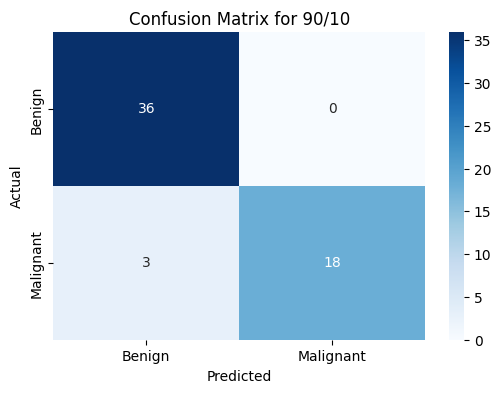

In [16]:
# 2. Lặp qua từng tập con để huấn luyện, đánh giá, và lưu kết quả
results = {}
for split_name, dataset in datasets.items():
    # Huấn luyện mô hình
    model = DecisionTreeClassifier(criterion='entropy', random_state=42)
    model.fit(dataset['feature_train'], dataset['label_train'])
    
    # Đánh giá mô hình
    accuracy = evaluate_model(
        features_test=dataset['feature_test'],
        labels_test=dataset['label_test'],
        model=model,
        split_name=split_name
    )
    
    # Lưu kết quả
    results[split_name] = accuracy


In [17]:
# 3. Hiển thị tổng hợp kết quả độ chính xác
print("--- Summary of Accuracy for Each Split ---")
for split_name, accuracy in results.items():
    print(f"Accuracy for {split_name}: {accuracy:.6f}")


--- Summary of Accuracy for Each Split ---
Accuracy for 40/60: 0.929825
Accuracy for 60/40: 0.912281
Accuracy for 80/20: 0.921053
Accuracy for 90/10: 0.947368


### 2.4 Độ sâu và độ chính xác của Decision Tree

In [18]:
# 1. Lấy bộ dữ liệu huấn luyện và kiểm tra 80/20
X_train = datasets['80/20']['feature_train']
y_train = datasets['80/20']['label_train']
X_test = datasets['80/20']['feature_test']
y_test = datasets['80/20']['label_test']

--- Decision Tree with max_depth=None ---


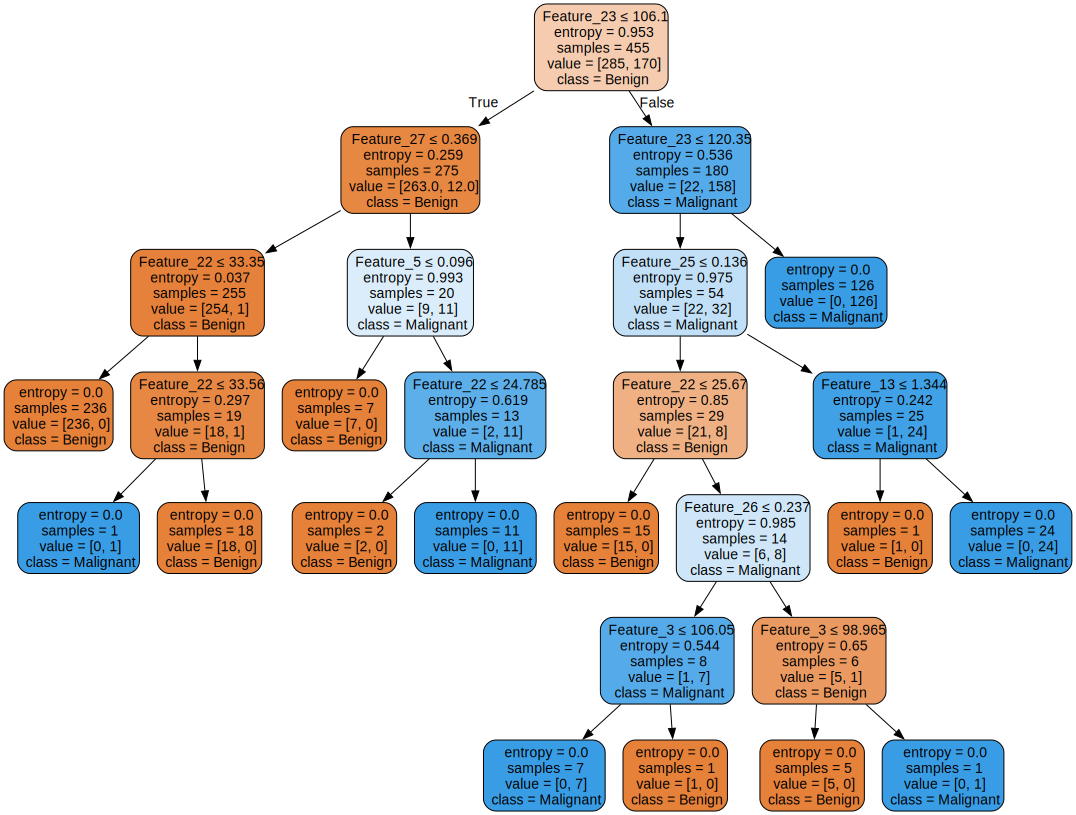

--- Decision Tree with max_depth=2 ---


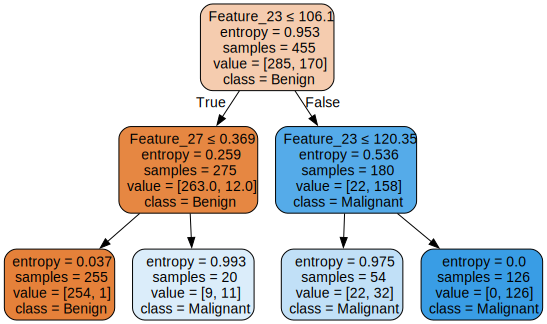

--- Decision Tree with max_depth=3 ---


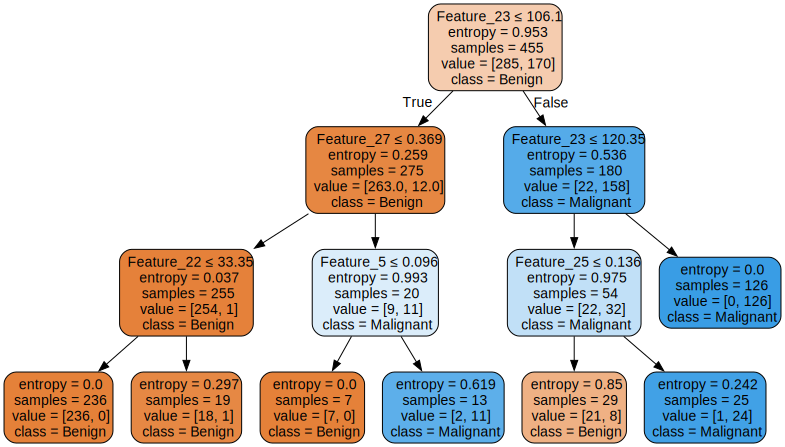

--- Decision Tree with max_depth=4 ---


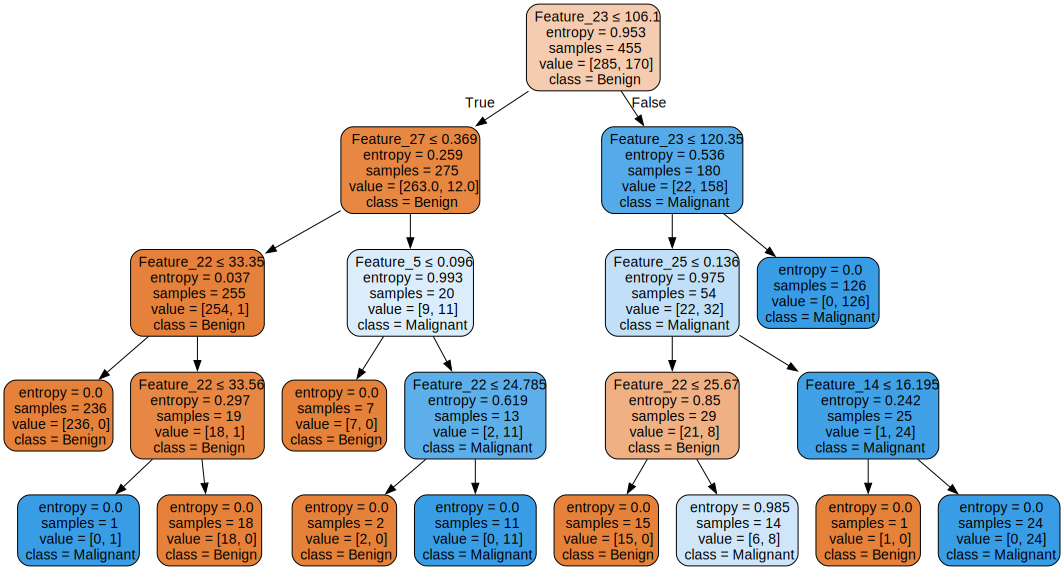

--- Decision Tree with max_depth=5 ---


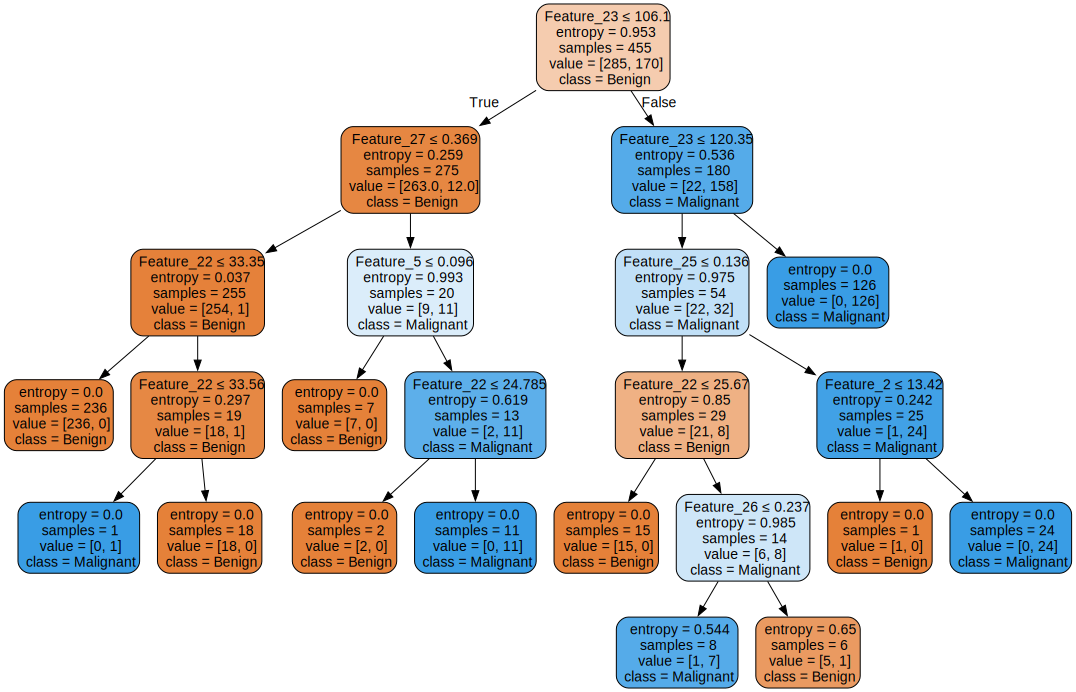

--- Decision Tree with max_depth=6 ---


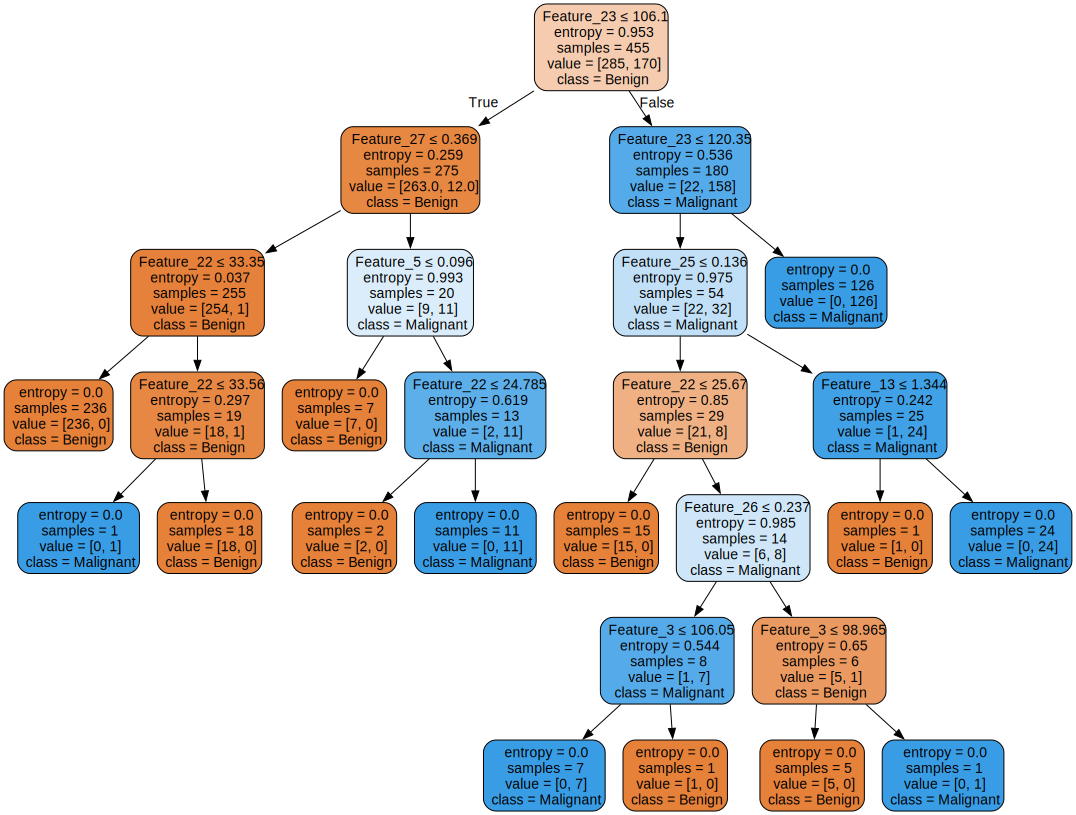

--- Decision Tree with max_depth=7 ---


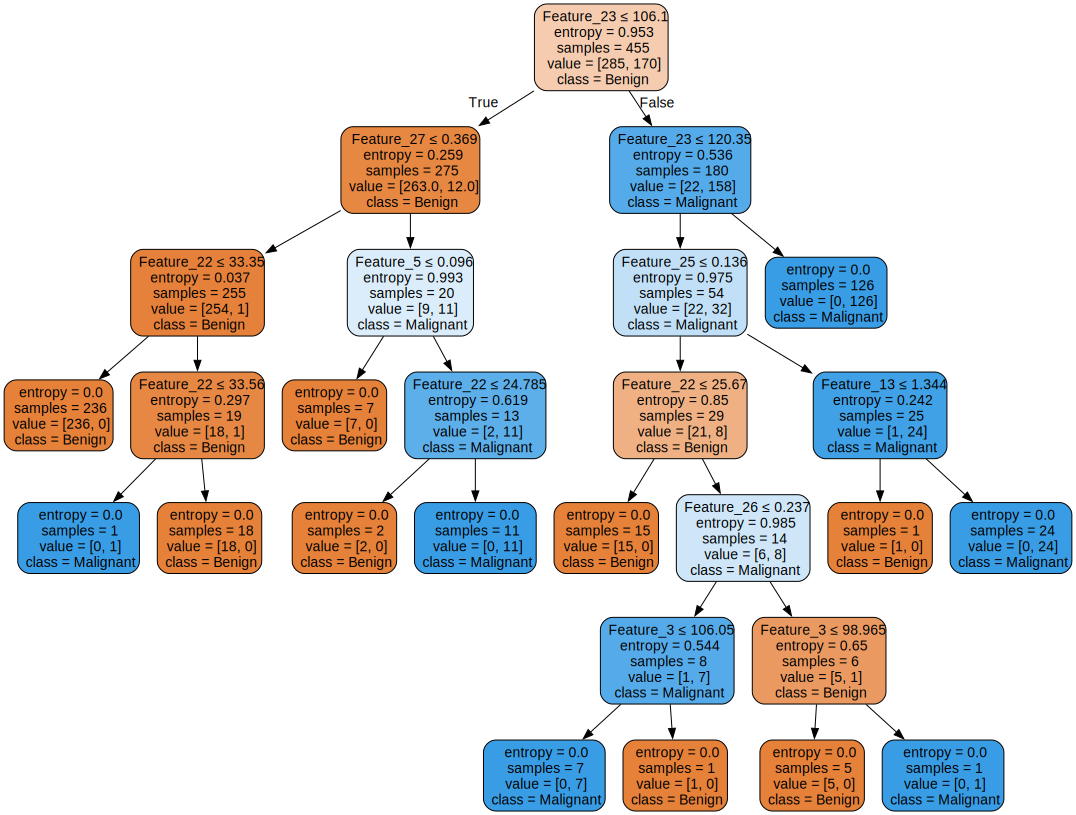

In [19]:
# 2. Thử nghiệm với các giá trị max_depth khác nhau
max_depth_values = [None, 2, 3, 4, 5, 6, 7]
accuracy_scores = {}

for max_depth in max_depth_values:
    # Tạo và huấn luyện cây quyết định với max_depth
    model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Dự đoán và tính độ chính xác
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracy_scores[max_depth] = accuracy
    
    # Trực quan hóa cây quyết định
    print(f"--- Decision Tree with max_depth={max_depth} ---")
    dot_data = export_graphviz(
        model,
        out_file=None,
        feature_names=X_train.columns,
        class_names=['Benign', 'Malignant'],
        filled=True,
        rounded=True,
        special_characters=True
    )
    graph = graphviz.Source(dot_data)
    file_name = f"output2/tree_max_depth_{'None' if max_depth is None else max_depth}"
    graph.render(file_name)  # Lưu file PDF
    display(graph)


In [20]:
# 3. Hiển thị bảng kết quả
print("--- Accuracy Scores ---")
print("max_depth\tAccuracy")
for max_depth, accuracy in accuracy_scores.items():
    print(f"{'None' if max_depth is None else max_depth}\t\t{accuracy:.6f}")

--- Accuracy Scores ---
max_depth	Accuracy
None		0.921053
2		0.868421
3		0.921053
4		0.929825
5		0.921053
6		0.921053
7		0.921053


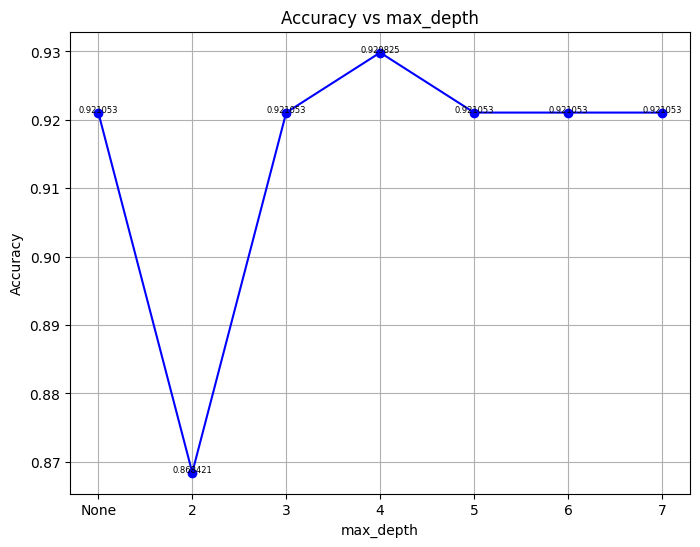

In [21]:
# 4. Vẽ biểu đồ độ chính xác
depth_labels = ['None' if d is None else d for d in max_depth_values]
accuracy_values = list(accuracy_scores.values())

plt.figure(figsize=(8, 6))
plt.plot(depth_labels, accuracy_values, marker='o', linestyle='-', color='b')
plt.title("Accuracy vs max_depth")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.grid(True)
for i, txt in enumerate(accuracy_values):
    plt.text(i, accuracy_values[i], f"{accuracy_values[i]:.6f}", fontsize=6, ha='center')

plt.show()
